Part 1: Introduction to Support Vector Machines
Formal Explanation:

In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, the method is likely to give poor performances.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).
Let's go ahead and break down the main idea of SVMs!

In [8]:
from IPython.core.display import HTML 
from IPython.display import Image
url = 'http://opencv-python-tutroals.readthedocs.io/en/latest/_images/svm_basics1.png'
Image(url)
%matplotlib inline

In [7]:
url= 'http://docs.opencv.org/_images/optimal-hyperplane.png'
Image(url)

<IPython.core.display.Image object>

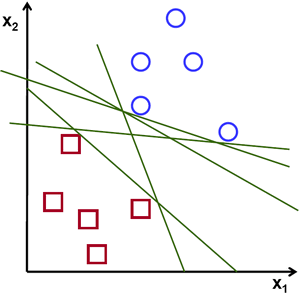

In [11]:
Image(filename ="svm_basics1.png")

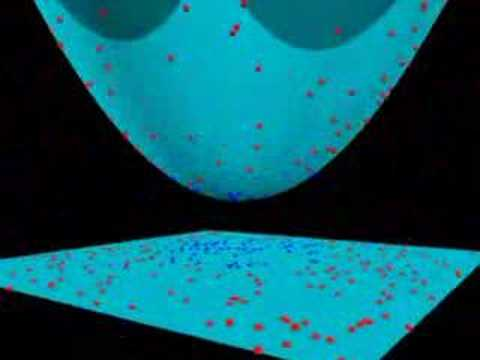

In [12]:
# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

In [13]:
# Andrew Ng Lecture
YouTubeVideo('qdnT_jGTg2s')

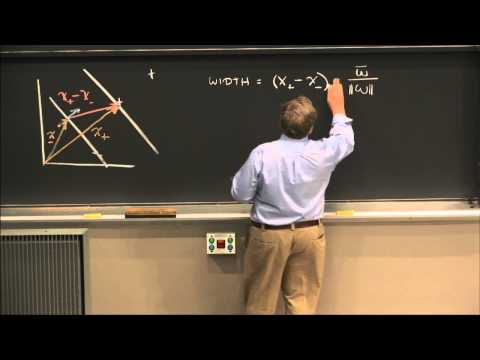

In [14]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
from sklearn import datasets

In [19]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [20]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC()

In [23]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [30]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
from sklearn import metrics

In [32]:
predicted = model.predict(X_test)

expected = Y_test

In [33]:
print metrics.accuracy_score(expected,predicted)

0.966666666667


In [35]:
#decreasing the test size
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=3)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)

expected = Y_test
print metrics.accuracy_score(expected,predicted)

0.977777777778


In [36]:
#decreasing the test size
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,random_state=3)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)

expected = Y_test
print metrics.accuracy_score(expected,predicted)

1.0


In [37]:
from sklearn import svm

In [38]:
X = iris.data[:,:2]

Y = iris.target

In [41]:
C = 1.0

In [42]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [43]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [44]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [45]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [46]:
h = 0.02

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

In [47]:
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [48]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [50]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


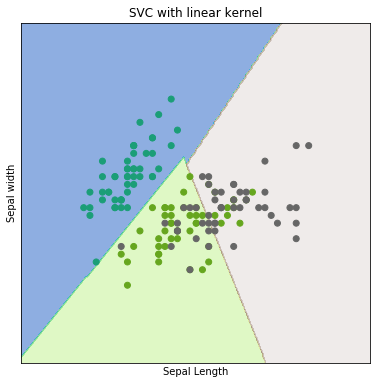

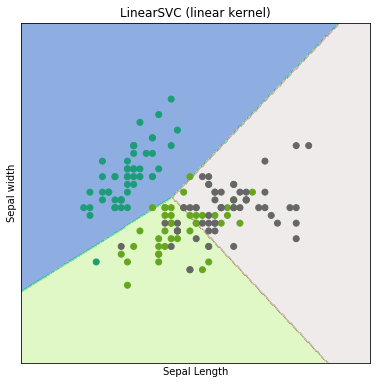

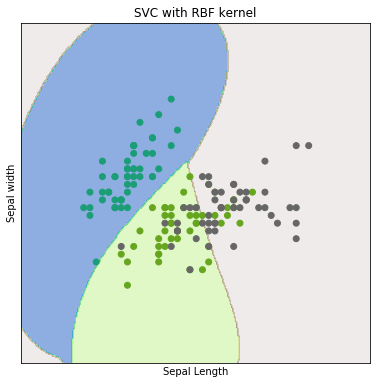

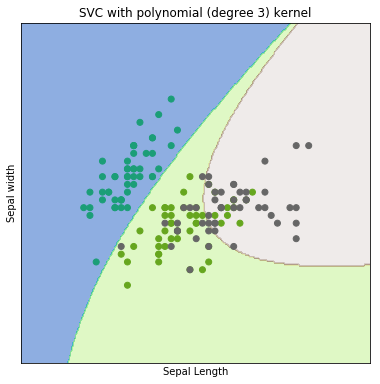

In [53]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    